<a href="https://colab.research.google.com/github/JumanaRahim/workshop/blob/master/ccd_PROJECT_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import RobustScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load data set
data=pd.read_csv("/content/creditcard.....csv")

Checking the target classes

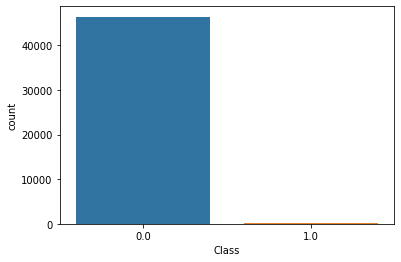

In [3]:
import seaborn as sns
sns.countplot(x='Class', data=data)

Data Pre-processing

In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46589 entries, 0 to 46588
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    46589 non-null  int64  
 1   V1      46589 non-null  float64
 2   V2      46589 non-null  float64
 3   V3      46589 non-null  float64
 4   V4      46589 non-null  float64
 5   V5      46589 non-null  float64
 6   V6      46589 non-null  float64
 7   V7      46589 non-null  float64
 8   V8      46589 non-null  float64
 9   V9      46589 non-null  float64
 10  V10     46588 non-null  float64
 11  V11     46588 non-null  float64
 12  V12     46588 non-null  float64
 13  V13     46588 non-null  float64
 14  V14     46588 non-null  float64
 15  V15     46588 non-null  float64
 16  V16     46588 non-null  float64
 17  V17     46588 non-null  float64
 18  V18     46588 non-null  float64
 19  V19     46588 non-null  float64
 20  V20     46588 non-null  float64
 21  V21     46588 non-null  float64
 22

In [5]:
# no null values
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,46589.000000,46589.000000,46589.000000,46589.000000,46589.000000,46589.000000,46589.000000,46589.000000,46589.000000,46589.000000,...,46588.000000,46588.000000,46588.000000,46588.000000,46588.000000,46588.000000,46588.000000,46588.000000,46588.000000,46588.000000
mean,27851.057610,-0.239003,0.026900,0.695500,0.191485,-0.248247,0.100511,-0.119761,0.052467,0.148823,...,-0.027562,-0.107969,-0.038925,0.009212,0.136561,0.022252,0.005427,0.004430,90.998074,0.003069
std,12952.205014,1.884441,1.612160,1.525677,1.402471,1.411289,1.309765,1.280726,1.219681,1.218640,...,0.737335,0.637009,0.573238,0.592960,0.437750,0.502711,0.388188,0.336843,240.561156,0.055318
min,0.000000,-56.407510,-72.715728,-32.965346,-5.172595,-42.147898,-26.160506,-26.548144,-41.484823,-9.283925,...,-20.262054,-8.593642,-26.751119,-2.836627,-7.495741,-1.438650,-8.567638,-9.617915,0.000000,0.000000
25%,19914.000000,-0.987401,-0.546048,0.221486,-0.714182,-0.854273,-0.637796,-0.601341,-0.147779,-0.594609,...,-0.232577,-0.529360,-0.178930,-0.321471,-0.127981,-0.329792,-0.063695,-0.006801,7.580000,0.000000
50%,32678.000000,-0.247756,0.087096,0.800575,0.193697,-0.281120,-0.154350,-0.074278,0.055705,0.033119,...,-0.069801,-0.083028,-0.051225,0.062202,0.175840,-0.068393,0.008476,0.021858,24.990000,0.000000
75%,37889.000000,1.156804,0.738504,1.432977,1.071169,0.287704,0.489690,0.427225,0.327459,0.847974,...,0.106302,0.305583,0.078248,0.401393,0.421708,0.302286,0.083973,0.076195,82.985000,0.000000
max,42847.000000,1.960497,18.183626,4.101716,16.491217,34.801666,22.529298,36.677268,20.007208,10.392889,...,22.614889,5.805795,17.297845,4.014444,5.525093,3.517346,11.135740,33.847808,7879.420000,1.000000


In [6]:
# no null values in the dataset
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [7]:
data_real = data.replace(np.inf, np.nan)

In [8]:
data_real.isnull().sum().sum()

21

In [9]:
data_df = data_real.dropna(axis=0)

In [10]:
data_df.isnull().sum().sum()

0

In [11]:
data_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46583,42845,-1.826702,2.251750,1.024731,2.756916,-0.306971,0.773380,-0.995891,-4.779501,-0.995383,...,4.667206,-1.014737,0.665347,0.304694,-0.271907,0.286233,0.500522,0.139953,34.13,0.0
46584,42846,-0.435096,-0.024841,1.045300,0.136425,0.616868,0.220339,0.510834,-0.066357,0.544935,...,-0.278543,-0.378480,0.412543,-0.789501,-0.622834,0.093962,-0.127857,-0.196574,28.97,0.0
46585,42847,0.338756,-1.376843,0.791363,1.359250,-1.003488,1.067372,-0.415550,0.476103,0.654954,...,0.303538,0.175247,-0.256606,-0.298372,0.035234,-0.392296,0.021894,0.081674,367.00,0.0
46586,42847,1.332942,-1.272496,0.444492,-1.392454,-1.559862,-0.359790,-1.113608,0.083414,-1.936615,...,-0.109520,-0.086444,0.053623,0.181360,0.198497,-0.207608,0.026217,0.014535,57.82,0.0


In [ ]:
# Scaling the data: RobustScaler is less prone to outliers.
rob_scaler = RobustScaler()
data_df['scaled_amount'] = rob_scaler.fit_transform(
    data_df['Amount'].values.reshape(-1, 1))
data_df['scaled_time'] = rob_scaler.fit_transform(
  data_df['Time'].values.reshape(-1, 1))
    
data_df.drop(['Time', 'Amount'], axis=1, inplace=True)

# visualize the data
data_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.0,2.819610,-0.623123
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.0,-0.278545,-0.623123
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.0,7.649130,-0.623060
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.0,2.268846,-0.623060
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.0,1.140538,-0.622996


In [12]:
x = data_df.drop(['Class'], axis = 1)

In [13]:
x.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [14]:
y = data_df['Class']

In [15]:
y

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
46583    0.0
46584    0.0
46585    0.0
46586    0.0
46587    0.0
Name: Class, Length: 46588, dtype: float64

Label Encoding

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_trans = le.fit_transform(y)
le_fid = LabelEncoder()

Applying SMOTE with Over Sampling

In [17]:
#Apply SMOTE to create synthetic observations from minority class
#Over sampling
from imblearn.over_sampling import SMOTE 
sm = SMOTE(sampling_strategy='auto',random_state=None)
x_sampled,y_sampled = sm.fit_resample(x,y.values.ravel())

#Percentage of fraudlent records in original data
Source_data_no_fraud_count = len(data[data.Class==0])
Source_data_fraud_count = len(data[data.Class==1])
print('Percentage of fraud counts in original dataset:{}%'.format((Source_data_fraud_count*100)/(Source_data_no_fraud_count+Source_data_fraud_count)))

#Percentage of fraudlent records in sampled data
Sampled_data_no_fraud_count = len(y_sampled[y_sampled==0])
Sampled_data_fraud_count = len(y_sampled[y_sampled==1])
print('Percentage of fraud counts in the new data:{}%'.format((Sampled_data_fraud_count*100)/(Sampled_data_no_fraud_count+Sampled_data_fraud_count)))

Percentage of fraud counts in original dataset:0.3069459946767408%
Percentage of fraud counts in the new data:50.0%


Train Test Split

In [18]:
from sklearn.model_selection import train_test_split

# Whole dataset
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 0)

print("Number transactions train dataset: ", len(X_train))
print("Number transactions test dataset: ", len(X_test))
print("Total number of transactions: ", len(X_train)+len(X_test))

# Undersampled dataset
X_train_sampled, X_test_sampled, y_train_sampled, y_test_sampled = train_test_split(x_sampled ,y_sampled,test_size = 0.3,random_state = 0)
print("")
print("Number transactions train dataset: ", len(X_train_sampled))
print("Number transactions test dataset: ", len(X_test_sampled))
print("Total number of transactions: ", len(X_train_sampled)+len(X_test_sampled))

X_train_sampled_df = pd.DataFrame(X_train_sampled)
y_train_sampled_df = pd.DataFrame(y_train_sampled)
X_test_sampled_df = pd.DataFrame(X_test_sampled)
y_test_sampled_df = pd.DataFrame(y_test_sampled)

Number transactions train dataset:  32611
Number transactions test dataset:  13977
Total number of transactions:  46588

Number transactions train dataset:  65023
Number transactions test dataset:  27867
Total number of transactions:  92890


Feature Importance

In [19]:
# feature importance
mutual_info = mutual_info_classif(X_train_sampled_df, y_train_sampled_df)
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train_sampled.columns
mutual_info.sort_values(ascending = False)

V14       0.617337
V4        0.588586
V12       0.570313
V10       0.566137
V11       0.559066
V3        0.557107
V17       0.516577
V2        0.486195
V16       0.472071
V7        0.447603
V9        0.413276
V6        0.397960
V21       0.383452
V27       0.368102
V18       0.347367
V1        0.346446
V28       0.325173
Time      0.311874
V5        0.308075
Amount    0.292907
V8        0.272813
V20       0.213367
V26       0.198428
V19       0.162094
V23       0.129526
V25       0.116956
V24       0.116462
V13       0.082450
V15       0.063963
V22       0.042507
dtype: float64

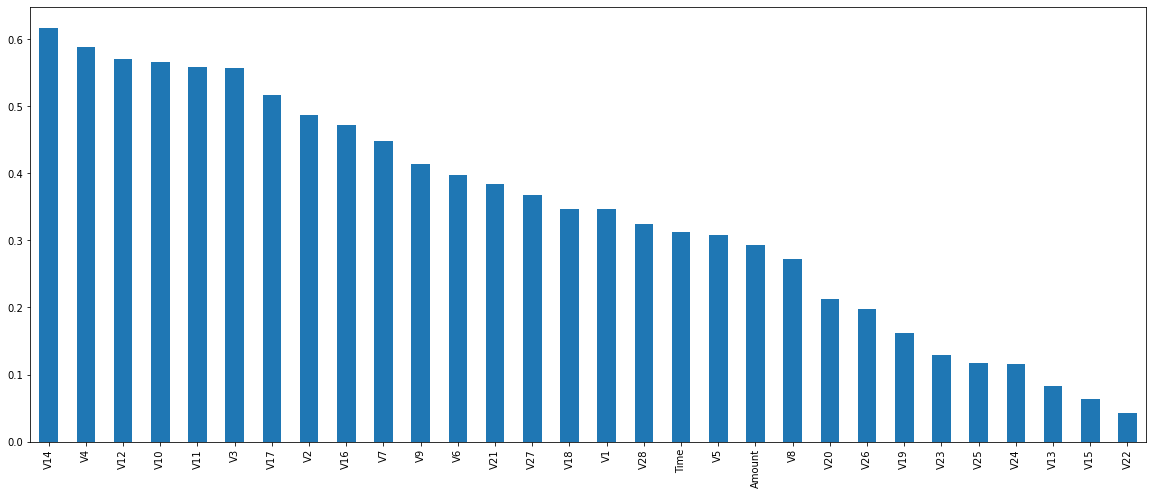

In [20]:
# visualize the feature importance
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20,8))

Feature selection

In [21]:
# select top 15 features
selector = SelectKBest(mutual_info_classif, k=15)
selector.fit(X_train_sampled, y_train_sampled)

# Get columns to keep and create new dataframe - "new_train"
cols = selector.get_support(indices=True)

# new dataframes
new_train = X_train_sampled.iloc[:,cols]
new_test = X_test_sampled.iloc[:,cols]

In [22]:
new_train

,V2,V3,V4,V6,V7,V9,V10,V11,V12,V14,V16,V17,V18,V21,V27
22839,0.357941,1.220338,0.331401,0.429039,-0.306671,0.115670,-0.336947,1.016162,1.043403,0.160384,-0.451743,0.165907,-0.445735,0.768306,0.151838
54007,4.020591,-7.625491,6.360562,-2.465431,-5.014371,-2.865433,-8.071575,7.540702,-11.625231,-11.989104,-6.048133,-8.178870,-2.699806,0.948874,1.202834
20397,-0.228885,0.520853,-0.730679,-1.025654,-0.240361,1.543538,-1.059493,-0.373410,0.894449,-0.038739,-0.707237,-0.053803,-0.015487,0.000635,0.073852
50798,0.900242,0.382083,3.164359,-0.221676,-0.019901,0.861002,-0.590930,1.035700,-2.556804,-0.335380,0.356689,2.275115,-0.134321,-0.426744,0.012303
30160,0.248101,0.433550,-0.595238,-0.498232,1.654391,-0.938881,-0.502077,0.831729,-0.028507,0.744099,0.149309,-0.497166,0.274654,0.211243,-0.062780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21243,-2.050144,-0.466434,-0.042731,-0.904008,0.379405,-0.750893,0.415683,-0.850408,-0.383996,0.269379,-1.700238,0.368616,0.780434,-0.160474,-0.165922
45891,-0.719838,0.901751,0.080120,0.654128,-0.647104,0.819952,-0.399419,0.983344,1.712002,-0.502035,-0.148445,0.005787,-0.572730,-0.105128,-0.034767
42613,-0.886473,2.370167,0.300101,1.149399,0.555557,1.209615,-1.323822,-1.014995,0.400769,-1.132299,-0.852031,0.894782,-0.798533,0.165073,-0.068823
43567,-0.143305,0.409470,1.401199,0.041466,0.057357,0.069849,0.015851,1.275844,1.070128,0.376730,-0.555960,0.113693,-0.481653,0.011079,0.017372


Model Training

1 Decision-tree

In [23]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=None,min_samples_split=2, max_leaf_nodes=None)
dt.fit(new_train, y_train_sampled_df)
test_pred = dt.predict(new_test)

In [24]:
Y_predicted_dt = dt.predict(new_test)
Y_pred_train_dt = dt.predict(new_train)

In [25]:
print('\n Confusion Matrix \n')
print(confusion_matrix(Y_predicted_dt, y_test_sampled_df))

ac = accuracy_score(y_test_sampled_df, Y_predicted_dt)
print('\n Macro Averaged Accuracy :'+str(ac))

pr = precision_score(y_test_sampled_df, Y_predicted_dt, average='macro')
print('\n Macro Averaged Precision :'+str(pr))

re = recall_score(y_test_sampled_df, Y_predicted_dt, average='macro')
print('\n Macro Averaged Recall :'+str(re))

fm = f1_score(y_test_sampled_df, Y_predicted_dt, average='macro')
print('\n Macro Averaged F1-Score :'+str(fm))

fm = f1_score(y_train_sampled_df, Y_pred_train_dt, average='macro')
print('\n Macro Averaged F1-Score on training :'+str(fm))

fm = f1_score(y_test_sampled_df, Y_predicted_dt, average='micro')
print('\n Micro Averaged F1-Score:'+str(fm))


 Confusion Matrix 

[[13865     3]
 [   10 13989]]

 Macro Averaged Accuracy :0.9995334984031291

 Macro Averaged Precision :0.9995346689541651

 Macro Averaged Recall :0.9995324355230015

 Macro Averaged F1-Score :0.9995334891662626

 Macro Averaged F1-Score on training :1.0

 Micro Averaged F1-Score:0.9995334984031291


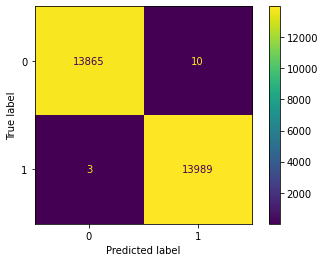

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test_sampled_df,Y_predicted_dt)
class_names = [0,1]
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=class_names)
disp.plot()
plt.show()

[Text(0.43786127167630057, 0.9615384615384616, 'X[9] <= -1.808\nentropy = 1.0\nsamples = 65023\nvalue = [32570, 32453]'),
 Text(0.26011560693641617, 0.8846153846153846, 'X[2] <= 1.973\nentropy = 0.138\nsamples = 32164\nvalue = [626, 31538]'),
 Text(0.1676300578034682, 0.8076923076923077, 'X[13] <= 0.117\nentropy = 0.989\nsamples = 1000\nvalue = [561, 439]'),
 Text(0.12138728323699421, 0.7307692307692307, 'X[6] <= -1.956\nentropy = 0.269\nsamples = 565\nvalue = [539, 26]'),
 Text(0.09826589595375723, 0.6538461538461539, 'X[6] <= -1.987\nentropy = 0.947\nsamples = 41\nvalue = [15, 26]'),
 Text(0.07514450867052024, 0.5769230769230769, 'X[7] <= 3.405\nentropy = 0.337\nsamples = 16\nvalue = [15, 1]'),
 Text(0.05202312138728324, 0.5, 'entropy = 0.0\nsamples = 15\nvalue = [15, 0]'),
 Text(0.09826589595375723, 0.5, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.12138728323699421, 0.5769230769230769, 'entropy = 0.0\nsamples = 25\nvalue = [0, 25]'),
 Text(0.14450867052023122, 0.653846153

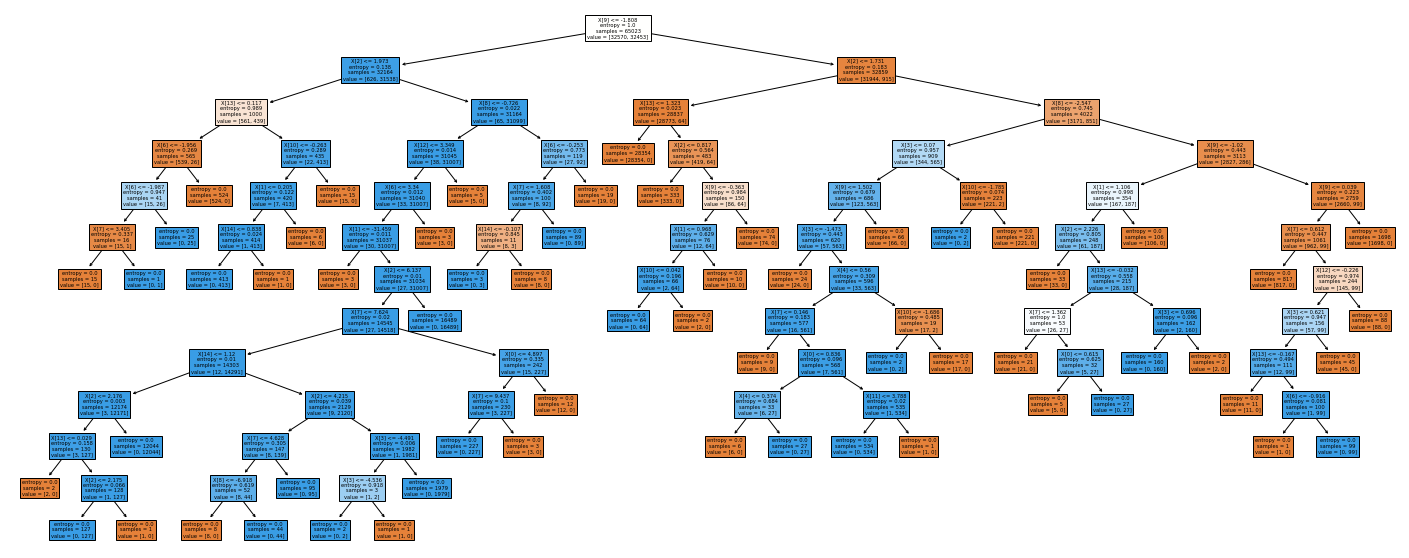

In [27]:
plt.figure(figsize=(25, 10))
tree.plot_tree(dt, filled=True)

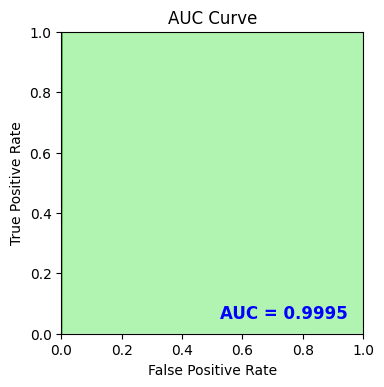

In [30]:
from sklearn import metrics
auc = metrics.roc_auc_score(y_test_sampled_df, Y_predicted_dt)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test_sampled_df, Y_predicted_dt)

plt.figure(figsize=(8, 4), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

2.Random forest

In [ ]:
rf = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=None)
rf = rf.fit(new_train,y_train_sampled_df)
Y_predicted_rf = rf.predict(new_test)
Y_pred_train_rf = rf.predict(new_train)

In [ ]:
print('\n Confusion Matrix \n')
print(confusion_matrix(Y_predicted_rf, y_test_sampled_df))

ac = accuracy_score(y_test_sampled_df, Y_predicted_rf)
print('\n Macro Averaged Accuracy :'+str(ac))

pr = precision_score(y_test_sampled_df, Y_predicted_rf, average='macro')
print('\n Macro Averaged Precision :'+str(pr))

re = recall_score(y_test_sampled_df, Y_predicted_rf, average='macro')
print('\n Macro Averaged Recall :'+str(re))

fm = f1_score(y_test_sampled_df, Y_predicted_rf, average='macro')
print('\n Macro Averaged F1-Score :'+str(fm))

fm = f1_score(y_test_sampled_df, Y_predicted_rf, average='micro')
print('\n Micro Averaged F1-Score:'+str(fm))


 Confusion Matrix 

[[4338    0]
 [   1 4381]]

 Macro Averaged Accuracy :0.9998853211009174

 Macro Averaged Precision :0.9998858968507531

 Macro Averaged Recall :0.9998847660751324

 Macro Averaged F1-Score :0.9998853183122417

 Micro Averaged F1-Score:0.9998853211009174


XG Boost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb= GradientBoostingClassifier()
gb = gb.fit(new_train, y_train_sampled_df)
Y_predicted_gb = gb.predict(new_test)
Y_pred_train_gb = gb.predict(new_train)

In [ ]:
print('\n Confusion Matrix \n')
print(confusion_matrix(Y_predicted_gb, y_test_sampled_df))

ac = accuracy_score(y_test_sampled_df, Y_predicted_gb)
print('\n Macro Averaged Accuracy :'+str(ac))

pr = precision_score(y_test_sampled_df, Y_predicted_gb, average='macro')
print('\n Macro Averaged Precision :'+str(pr))

re = recall_score(y_test_sampled_df,Y_predicted_gb, average='macro')
print('\n Macro Averaged Recall :'+str(re))

fm = f1_score(y_test_sampled_df, Y_predicted_gb, average='macro')
print('\n Macro Averaged F1-Score :'+str(fm))

fm = f1_score(y_test_sampled_df,Y_predicted_gb, average='micro')
print('\n Micro Averaged F1-Score:'+str(fm))


 Confusion Matrix 

[[4333    0]
 [   6 4381]]

 Macro Averaged Accuracy :0.9993119266055046

 Macro Averaged Precision :0.999316161385913

 Macro Averaged Recall :0.9993085964507951

 Macro Averaged F1-Score :0.999311905755919

 Micro Averaged F1-Score:0.9993119266055046


In [ ]:
# AUC ROC scores on the training and test dataset
AUC_ROC_Score = roc_auc_score(y_train_sampled_df, dt.predict_proba(new_train)[:, 1])
print("On training data, DT has a AUCROC Score of:", AUC_ROC_Score * 100)

AUC_ROC_Score = roc_auc_score(y_test_sampled_df, dt.predict_proba(new_test)[:, 1])
print("On test data, DT has a AUCROC Score of:", AUC_ROC_Score * 100)

On training data, DT has a AUCROC Score of: 100.0
On test data, DT has a AUCROC Score of: 99.94271445675213


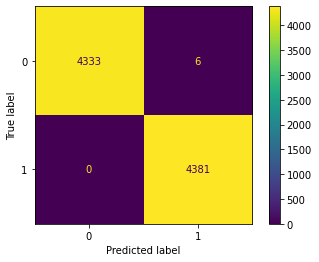

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test_sampled_df,Y_predicted_gb )
class_names = [0,1]
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=class_names)
disp.plot()
plt.show()